# 6주차 과제 1번째

#### 통계학과 201618968 김종원

#### 환경 : colab

### import 

In [ ]:
!pip install --upgrade fastai

In [2]:
import torch
from fastai.vision.all import * 

### Data

In [3]:
path = untar_data(URLs.MNIST_SAMPLE) 

In [4]:
threes=(path/'train'/'3').ls()
sevens=(path/'train'/'7').ls()

In [5]:
seven_tensor = torch.stack([tensor(Image.open(i)) for i in sevens]).float()/255
three_tensor = torch.stack([tensor(Image.open(i)) for i in threes]).float()/255

In [6]:
X=torch.vstack([seven_tensor,three_tensor]).reshape(12396,-1) 
y=torch.tensor([0.0]*6265 + [1.0]*6131).reshape(12396,1) 

In [7]:
ds=torch.utils.data.TensorDataset(X,y)

In [8]:
dl=torch.utils.data.DataLoader(ds,batch_size=1024,shuffle=True)

`-` 네트워크(아키텍처), 손실함수, 옵티마이저 

In [9]:
torch.manual_seed(1)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=784,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1)
    #torch.nn.Sigmoid()
)
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(net.parameters())

In [10]:
12396 / 1024 

12.10546875

- 총 13개의 미니배치가 만들어질것임 $\to$ 따라서 파라메터를 업데이트하는 횟수는 13 $\times$ epoc 임 (실제적으로는 12 $\times$ epoc) 

In [11]:
200/12

16.666666666666668

In [12]:
for epoc in range(17): 
    for xx,yy in dl:  ### 총 13번돌면 끝나는 for 
        ## 1 
        yyhat=net(xx)
        ## 2 
        loss= loss_fn(yyhat,yy) 
        ## 3 
        loss.backward()
        ## 4 
        optimizer.step()
        net.zero_grad() 

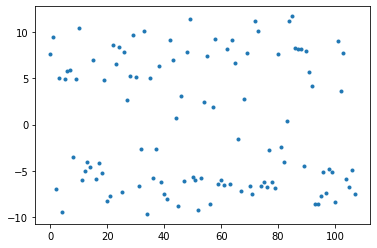

In [13]:
plt.plot(yyhat.data,'.')

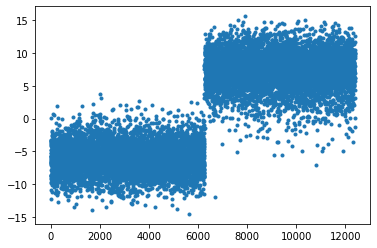

In [14]:
plt.plot(net(X).data,'.')

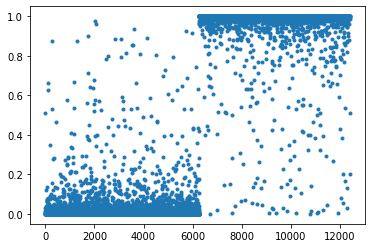

In [15]:
f=torch.nn.Sigmoid() 
plt.plot(f(net(X).data),'.')

마찬가지로 크게 다른 부분이 없어 보입니다.